### Abalone Case Study


**Problem Statement:<br>**
The age of abalone is determined by cutting the shell through the cone, staining it, <br>
and counting the number of rings through a microscope -- a boring and time-consuming task.<br>
Other measurements, which are easier to obtain, are used to predict the age. Further information,<br>
such as weather patterns and location (hence food availability) may be required to solve the problem.<br>

**Attribute Information<br>**

Given is the attribute name, attribute type, the measurement unit and a brief description.<br>
The number of rings is the value to predict. 
<br>
Name / Data Type / Measurement Unit / Description<br>
-----------------------------
Sex / nominal / -- / M, F, and I (infant)<br>
Length / continuous / mm / Longest shell measurement<br>
Diameter / continuous / mm / perpendicular to length<br>
Height / continuous / mm / with meat in shell<br>
Whole weight / continuous / grams / whole abalone<br>
Shucked weight / continuous / grams / weight of meat<br>
Viscera weight / continuous / grams / gut weight (after bleeding)<br>
Shell weight / continuous / grams / after being dried<br>
Rings / integer / -- / +1.5 gives the age in years. <br>
<br>
You have to predict the rings of each abalone which will lead us to the age of that abalone. <br>

In [2]:
import pandas as pd
import numpy as np


from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.to_csv('adalone_20220427.csv')

In [4]:
df = pd.read_csv('adalone_20220427.csv')
df = df.drop(['Unnamed: 0'], axis=1)
# df.head()

This is Continuous data.

In [5]:
le = LabelEncoder()
le_sex = le.fit_transform(df.Sex)

In [6]:
df['le_sex'] = le_sex

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,le_sex
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [8]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
le_sex              int64
dtype: object

Sex column is of object data type to handle this we used Label_Encoder to change it to the numerical form.

In [9]:
df.loc[df["le_sex"] == 2]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,le_sex
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9,2
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10,2
...,...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10,2
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2


## Checking Null values

In [10]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
le_sex            0
dtype: int64

## Visualization of Data:

In [11]:
import seaborn as sns

In [12]:
# print(df[['Sex','le_sex']].loc[df['le_sex']==0].head(1))
# df[['Sex','le_sex']].loc[df['le_sex']==1].head(1),
# df[['Sex','le_sex']].loc[df['le_sex']==2].head(1)
#      )

df['le_sex'].groupby(df['Sex']).unique().apply(pd.Series)

,0
Sex,
F,0
I,1
M,2


Data Description:</br>
**F = 0</br>
I = 1 </br>
M = 2**

2    1528
1    1342
0    1307
Name: le_sex, dtype: int64


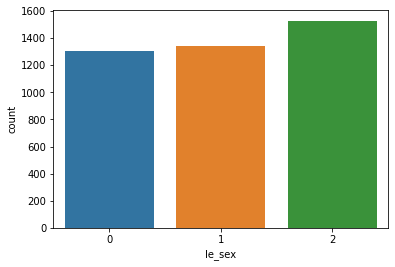

In [13]:
sns.countplot(data=df, x='le_sex')
print(df.le_sex.value_counts())

**These are descrete data columns**

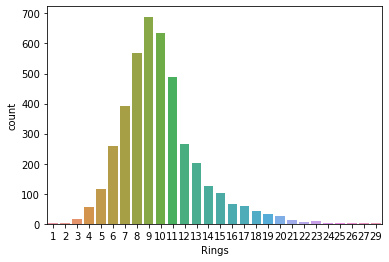

In [14]:
ax = sns.countplot(x='Rings',data=df)

All the other columns are populated with continuos data

In [15]:
df.columns.values

array(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings',
       'le_sex'], dtype=object)

## Checking the distribution of the continuous value of the columns

In [16]:
continuous_df = df[['Length','Diameter','Height','Whole weight','Shucked weight', 'Viscera weight','Shell weight' ]]

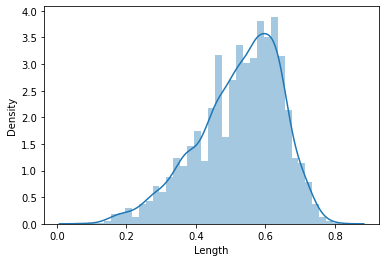

In [17]:
sns.distplot(df['Length'],kde=True)

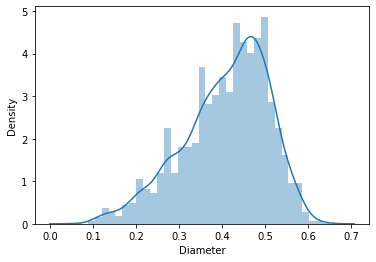

In [18]:
sns.distplot(df['Diameter'],kde=True)

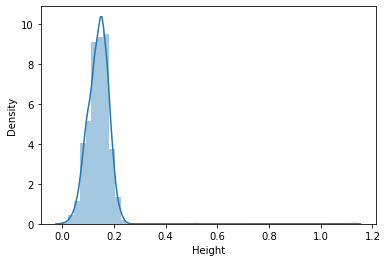

In [19]:
sns.distplot(df['Height'],kde=True)

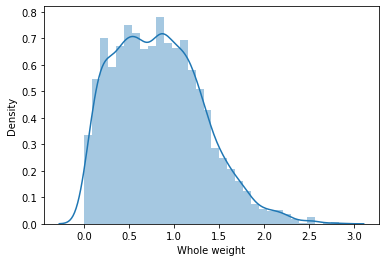

In [20]:
sns.distplot(df['Whole weight'], kde=True)

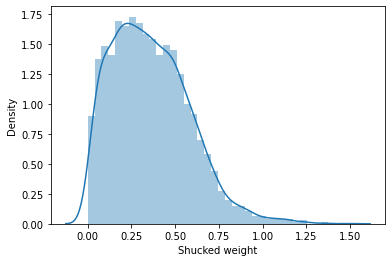

In [21]:
sns.distplot(df['Shucked weight'])

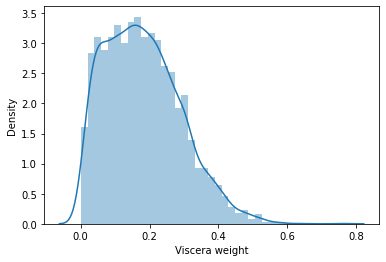

In [22]:
sns.distplot(df['Viscera weight'])

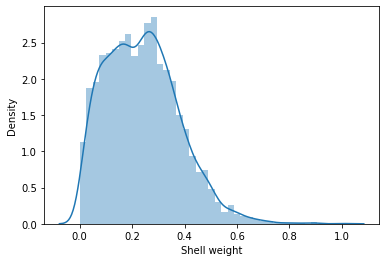

In [23]:
sns.distplot(df['Shell weight'],kde=True)

This data is not Normalized. Building blocks are going outside the curve.

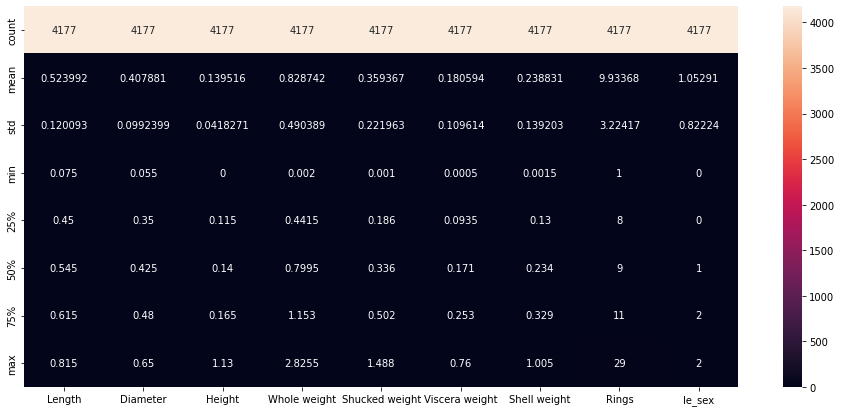

In [24]:
plt.figure(figsize = (16,7))
sns.heatmap(df.describe(), annot=True, fmt='0.6g')

[Puru] It doesn't make sense to do a HEATMAP of a matrix like this where the columns are of variables that lie on very different scales (different range of values)

## Correlation 

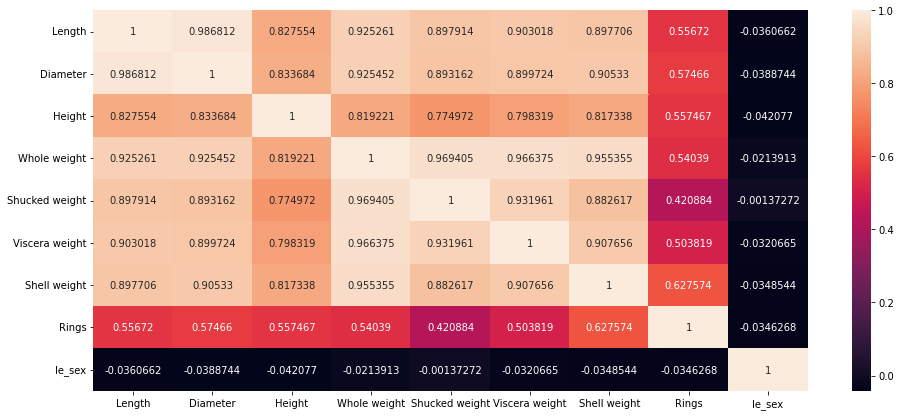

In [25]:
plt.figure(figsize = (16,7))
sns.heatmap(df.corr(), annot=True, fmt='0.6g')

**All the columns are showing more than 50% of correlation with the Rings(Target) column except "Shucked weight"**

**Max: 0.627** - Shell weight</br>
**Min: 0.42**    - Shucked weight

In [26]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,le_sex
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,-0.036066
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,-0.038874
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,-0.042077
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,-0.021391
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,-0.001373
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,-0.032067
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,-0.034854
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,-0.034627
le_sex,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627,1.000000


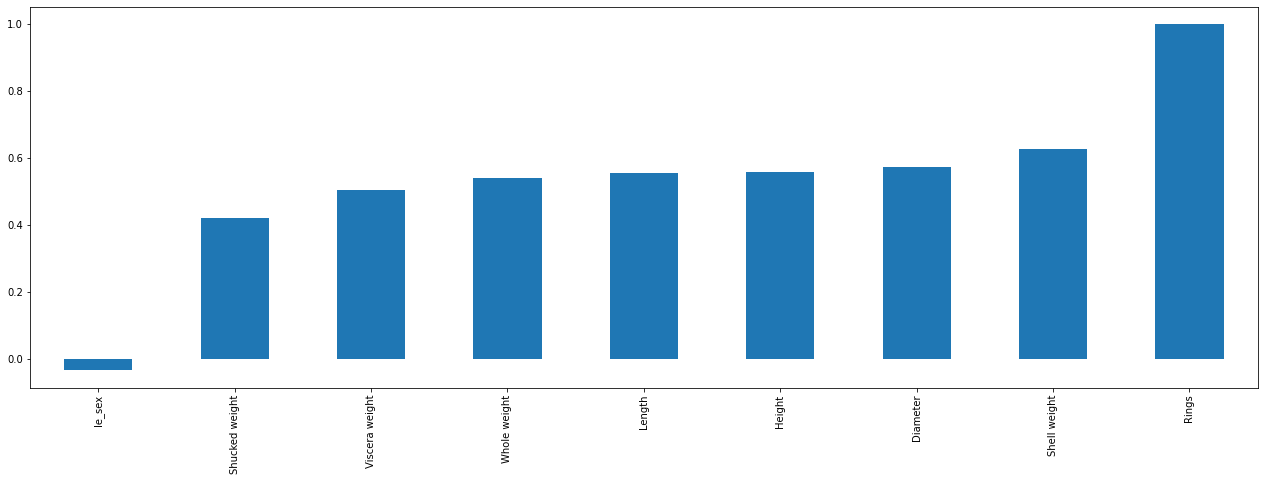

In [27]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=True).plot(kind='bar')

## Checking Skewness

In [28]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
le_sex           -0.098155
dtype: float64

Outcome of skewness: skewness threshold taken is +/- 0.5</br>
columns with skewness:</br>
**Height</br>
Shucked weight</br>**

### Checking Outliers

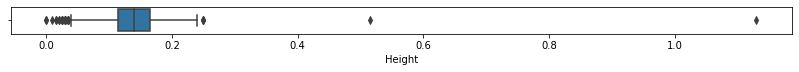

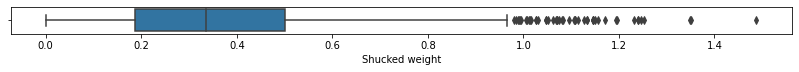

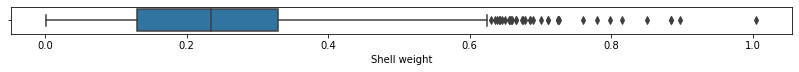

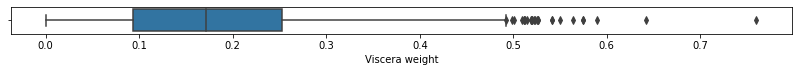

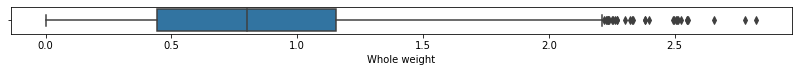

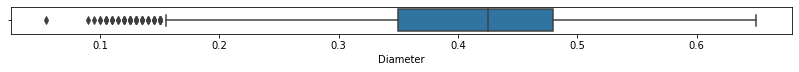

In [29]:
plt.figure(figsize=(14,0.5))
sns.boxplot(df['Height'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Shucked weight'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Shell weight'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Viscera weight'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Whole weight'])

plt.figure(figsize=(14,0.5))
sns.boxplot(df['Diameter'])

## Removing Outliers

Z-score Techniques

In [30]:
df = df.drop(['Sex'],axis=1)

In [31]:
from scipy.stats import zscore
import numpy as np

z = np.abs(zscore(df))
z.shape

(4177, 9)

In [32]:
threshold = 3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
        754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
       1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
       1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
       1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
       1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
       2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
       2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
       2436, 2459, 2471, 2544, 2623, 2624, 2624, 2

In [33]:
df_new = df[(z<3).all(axis=1)]

In [34]:
df_new.shape

(4027, 9)

In [35]:
z.shape

(4177, 9)

## Percentage of data loss

In [36]:
(4177-4027)/4177*100

3.5910940866650707

In [37]:
df_new['rings'] = df_new.Rings

In [38]:
df_new = df_new.drop(['Rings'],axis=1)

In [39]:
x = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]
x.shape

(4027, 8)

In [40]:
y.shape

(4027,)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=40)

In [44]:
lr.fit(x_train, y_train)

LinearRegression()

In [45]:
lr.score(x_train, y_train)

0.5045845454367894

In [46]:
pred_LR = lr.predict(x_test)

Text(0, 0.5, 'Predicted Data')

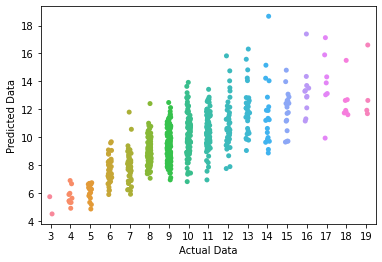

In [47]:
sns.stripplot(x = y_test, y = pred_LR)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')

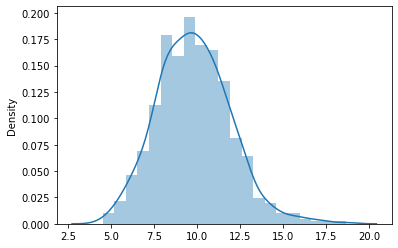

In [48]:
sns.distplot(pred_LR)

In [49]:
pd.DataFrame(pred_LR)

,0
0,8.650967
1,11.710284
2,12.795407
3,9.647762
4,10.770676
...,...
600,11.292815
601,9.153401
602,11.852824
603,10.078755


## Transforming data to remove skewness

In [50]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

x = pd.DataFrame(data=x_new , columns=x.columns)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,le_sex
0,-0.684451,-0.543379,-1.158933,-0.575135,-0.540865,-0.688032,-0.586354,1.134329
1,-1.411739,-1.401132,-1.280406,-1.354050,-1.311318,-1.332854,-1.332717,1.134329
2,-0.046219,0.037163,-0.128305,-0.184498,-0.362705,-0.240373,-0.080214,-1.313068
3,-0.799651,-0.543379,-0.395963,-0.570150,-0.592261,-0.539936,-0.542533,1.134329
4,-1.530577,-1.474343,-1.518600,-1.414577,-1.378735,-1.451548,-1.482926,-0.008746
...,...,...,...,...,...,...,...,...
4022,0.289495,0.390420,0.716250,0.277874,0.217107,0.690782,0.227258,-1.313068
4023,0.545081,0.269661,-0.128305,0.441584,0.534924,0.474179,0.314936,1.134329
4024,0.651129,0.705921,1.943633,0.853434,0.901897,1.089651,0.663632,1.134329
4025,0.926064,0.837713,0.286070,0.697385,0.924153,0.876428,0.577520,-1.313068


In [51]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
print(x)

y = power_transform(y.values.reshape(-1,1))
print(y)

[[-0.69636902 -0.55968799 -1.15577063 ... -0.68554452 -0.58731543
   1.17040866]
 [-1.38965308 -1.37971098 -1.27510641 ... -1.33733274 -1.33143498
   1.17040866]
 [-0.07070084  0.01277889 -0.13607028 ... -0.23524761 -0.08182179
  -1.27252548]
 ...
 [ 0.63932042  0.69613066  1.96359946 ...  1.08838208  0.66282829
   1.17040866]
 [ 0.92558947  0.83325383  0.27898755 ...  0.87737624  0.57653024
  -1.27252548]
 [ 2.03774649  1.91215437  1.63818146 ...  1.72231321  1.86026534
   1.17040866]]
[[ 1.67302766]
 [-0.97812692]
 [-0.15943945]
 ...
 [-0.15943945]
 [ 0.20009182]
 [ 0.84488768]]


In [52]:
max_rs = 0
max_acc = 0 

for i in range(0,1000):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=i)
  lr.fit(x_train, y_train)
  pred_lr = lr.predict(x_test)
  acc = lr.score(x_train,y_train)
  if acc>max_acc:
    max_acc = acc
    max_rs = i
    print("Best Prediction score: ",max_acc*100)
    print("Best RS score: ",max_rs)

Best Prediction score:  54.03089829262848
Best RS score:  0
Best Prediction score:  54.09967052059916
Best RS score:  5
Best Prediction score:  54.21819264626359
Best RS score:  19
Best Prediction score:  54.69608777973667
Best RS score:  53


Power transform increased performance by **5%**

In [53]:
#Performace before Power transform Vs after Power transform
(max_acc*100-0.5188024020590367*100)/(max_acc*100)*100

5.148169984611198

Ploting predicted data after applying power transform

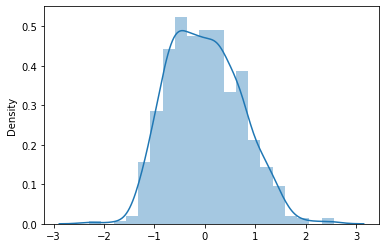

In [54]:
sns.distplot(pred_lr)

## Creating Train Test Split

In [55]:
#Linear Regression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=53)
lr.fit(x_train, y_train)
Pred = lr.predict(x_test)
lr.score(x_train, y_train)

0.5469608777973667

In [56]:
print('Mean absolute error: ', mean_absolute_error(y_test, Pred))

print('Mean squared error: ', mean_squared_error(y_test, Pred))

root_mean_squared = np.sqrt(mean_squared_error(y_test, Pred))
print("Root mean squared: ", root_mean_squared)

Mean absolute error:  0.5343643720646968
Mean squared error:  0.4850240637478746
Root mean squared:  0.6964366904090239


### Finding best fitting model

In [57]:
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [58]:
for i in [lr,svr,knn]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=53)
    i.fit(x_train, y_train)
    Pred = i.predict(x_test)
    print(i.score(x_train, y_train))

0.5469608777973667
0.6416369377289193
0.7082006092795352


In [59]:
(70.82-54.69)/70.82*100

22.77605196272239

**Among these 3 models KNN is performing 22.77% better than other models.**

**Finding best randon state.**


In [60]:
max_rs = 0
max_acc = 0 

for i in range(0,1000):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=i)
  knn = KNeighborsRegressor(n_neighbors=5)
  knn.fit(x_train, y_train)
  pred_knn = knn.predict(x_test)
  acc = knn.score(x_train,y_train)
  if acc>max_acc:
    max_acc = acc
    max_rs = i
    print("Best Prediction score: ",max_acc*100)
    print("Best RS score: ",max_rs)

Best Prediction score:  70.7686571535173
Best RS score:  0
Best Prediction score:  70.9501369238568
Best RS score:  3
Best Prediction score:  71.09348478829564
Best RS score:  19
Best Prediction score:  71.24448718687344
Best RS score:  199
Best Prediction score:  71.41766736582167
Best RS score:  241
Best Prediction score:  71.42221282537194
Best RS score:  399
Best Prediction score:  71.43916106585677
Best RS score:  558
Best Prediction score:  71.57484481337703
Best RS score:  756


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=756)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
print('Accuracy Score: ',round(knn.score(x_train,y_train)*100,3))

print('\nMean absolute error: ', round(mean_absolute_error(y_test, pred_knn)*100, 3))

print('Mean squared error: ', round(mean_squared_error(y_test, pred_knn)*100,3))

root_mean_squared = np.sqrt(mean_squared_error(y_test, pred_knn))
print("Root mean squared: ", round(root_mean_squared*100, 3))

Accuracy Score:  71.575

Mean absolute error:  54.077
Mean squared error:  49.129
Root mean squared:  70.092


## Seprating columns into Features and Target


In [62]:
features = df.drop('Rings',axis=1)
target = df['Rings']

In [63]:
print('Features:',features.shape,
      '\nTarget: ',target.shape)

Features: (4177, 8) 
Target:  (4177,)


### Scaling data using Min-Max Scaler:

In [64]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
max_acc = 0

for i in range(0,100):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size= .2, random_state=i)
  lr.fit(features_train, target_train)
  pred_train = lr.predict(features_train)
  pred_r2train = r2_score(target_train, pred_train)
  
  pred_test = lr.predict(features_test)
  pred_r2test = r2_score(target_test, pred_test)

  if pred_r2train > max_acc:
    max_acc = pred_r2train
    print(f"best random state is: {i}\nbest training accuracy: {pred_r2train}\nbest testing accuracy: {pred_r2test}")
  

best random state is: 0
best training accuracy: 0.5266943382158247
best testing accuracy: 0.5300147524184928
best random state is: 1
best training accuracy: 0.5342800756993598
best testing accuracy: 0.4992317277874876
best random state is: 4
best training accuracy: 0.5382795526015922
best testing accuracy: 0.47330646590738623
best random state is: 5
best training accuracy: 0.5388633829890346
best testing accuracy: 0.4813786513650815
best random state is: 19
best training accuracy: 0.542060143405233
best testing accuracy: 0.4685335689146205


In [67]:
max_acc = 0

for i in range(0,100):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size= .2, random_state=i)
  knn.fit(features_train, target_train)
  pred_train = knn.predict(features_train)
  pred_r2train = r2_score(target_train, pred_train)
  
  pred_test = knn.predict(features_test)
  pred_r2test = r2_score(target_test, pred_test)

  if pred_r2train > max_acc:
    max_acc = pred_r2train
    print(f"best random state is: {i}\nbest training accuracy: {pred_r2train}\nbest testing accuracy: {pred_r2test}")
  

best random state is: 0
best training accuracy: 0.6829576293953878
best testing accuracy: 0.5236374981094113
best random state is: 4
best training accuracy: 0.6839995591045276
best testing accuracy: 0.4793475243544564
best random state is: 9
best training accuracy: 0.6876468165798857
best testing accuracy: 0.4806627115131279
best random state is: 15
best training accuracy: 0.6880853091021555
best testing accuracy: 0.45856695339004194
best random state is: 19
best training accuracy: 0.6894386976380036
best testing accuracy: 0.4705805365378327


In [68]:
print(f"KNN is performing: {round((68.94-54.20)/68.94*100,2)}% better than LR model\n")
print('KNN Train: 68.94% and LR Train: 54.20%')
print('KNN Test: 47.05% and LR Test: 46.85%')

KNN is performing: 21.38% better than LR model

KNN Train: 68.94% and LR Train: 54.20%
KNN Test: 47.05% and LR Test: 46.85%


## Cross Validation

In [69]:
train_accuracy = r2_score(target_train, pred_train)
test_accuracy = r2_score(target_test, pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
  cv_score = cross_val_score(knn, features, target, cv=i)
  cv_mean = cv_score.mean()
  print(f'At cross fold: {i}\nCV Score: {cv_mean}\naccuraccy score training: {train_accuracy}\naccuracy score testing: {test_accuracy}\n\n')

# knn_val_score = cross_val_score(knn, x, y, cv = 5)
# print('Cross validation score KNN: ',knn_val_score.mean())

At cross fold: 2
CV Score: 0.4868599376939935
accuraccy score training: 0.6795824203155799
accuracy score testing: 0.5156186499594445


At cross fold: 3
CV Score: 0.4817998444189613
accuraccy score training: 0.6795824203155799
accuracy score testing: 0.5156186499594445


At cross fold: 4
CV Score: 0.4343688787436352
accuraccy score training: 0.6795824203155799
accuracy score testing: 0.5156186499594445


At cross fold: 5
CV Score: 0.427217254016496
accuraccy score training: 0.6795824203155799
accuracy score testing: 0.5156186499594445


At cross fold: 6
CV Score: 0.4405862872837776
accuraccy score training: 0.6795824203155799
accuracy score testing: 0.5156186499594445


At cross fold: 7
CV Score: 0.4545963707848539
accuraccy score training: 0.6795824203155799
accuracy score testing: 0.5156186499594445


At cross fold: 8
CV Score: 0.4139146372372214
accuraccy score training: 0.6795824203155799
accuracy score testing: 0.5156186499594445


At cross fold: 9
CV Score: 0.4381118519421088
acc

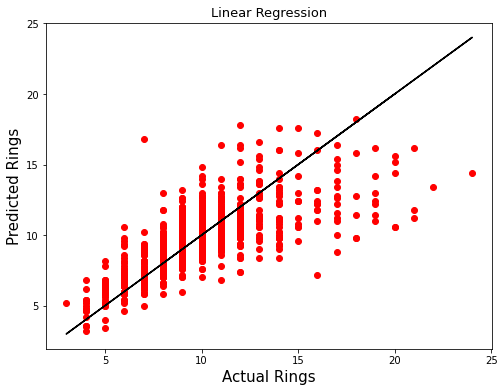

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x= target_test, y= pred_test, color='r')
plt.plot(target_test,target_test,color='black')
plt.xlabel('Actual Rings', fontsize=15)
plt.ylabel('Predicted Rings', fontsize=15)
plt.title('Linear Regression', fontsize= 13)
plt.show()

## **Regularization**

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
ls = Lasso()

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
clf = GridSearchCV(ls,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [72]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(features_train, target_train)
ls.score(features_train, target_train)

pred_ls = ls.predict(features_test)

lss = r2_score(target_test, pred_ls)
lss

0.4797005822836359

## Ensemble Technique

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'], 'max_features':['auto','sqrt','log2']}

rf = RandomForestRegressor()

clf = GridSearchCV(rf,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [79]:
rf = RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test, pred_decision)
print('R2 Score: ',rfs*100)

rfscore = cross_val_score(rf, features, target, cv=5)
rfc= rfscore.mean()
print('Cross Val Score: ', rfc*100)

R2 Score:  55.857588905187264
Cross Val Score:  46.21048100513395


## Save the Model

In [80]:
import pickle
filename = 'churn.pkl'
pickle.dump(rf,open(filename, 'wb'))